In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%cd ..

/home/purzelrakete/src/github.com/feldberlin/deepspeech


In [2]:
import os

import numpy as np
import torch
from torch.nn import functional as F
import matplotlib.pyplot as plt
import IPython.display as ipd
import wandb

from deepspeech import model, train, datasets, utils, viz, predict

/home/purzelrakete/src/github.com/feldberlin/deepspeech/.venv/lib/python3.7/site-packages/torchaudio/backend/utils.py:54: UserWarning: "sox" backend is being deprecated. The default backend will be changed to "sox_io" backend in 0.8.0 and "sox" backend will be removed in 0.9.0. Please migrate to "sox_io" backend. Please refer to https://github.com/pytorch/audio/issues/903 for the detail.
  '"sox" backend is being deprecated. '


## Train Deepspeech

In [3]:
dry = False
if dry:
    os.environ['WANDB_MODE'] = 'dryrun'

In [4]:
p = model.HParams(n_mels=128, sampling_rate=16000, datasets_dir='/srv/datasets')
tp = train.HParams(max_epochs=50, batch_size=72, learning_rate=0.00613, grad_norm_clip=1.0)
ds = datasets.LibriSpeech(p)
m = model.DeepSpeech(p)
trainset, testset = datasets.splits(ds, p)

# train
t = train.Trainer(m, trainset, testset, tp)

/home/purzelrakete/src/github.com/feldberlin/deepspeech/.venv/lib/python3.7/site-packages/torchaudio/functional.py:318: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (161) may be set too low.
  "At least one mel filterbank has all zero values. "


In [5]:
t.train()

wandb: Currently logged in as: purzelrakete (use `wandb login --relogin` to force relogin)
wandb: wandb version 0.10.18 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: WARNING Symlinked 1 file into the W&B run directory, call wandb.save again to sync new files.
  0%|          | 0/318 [00:00<?, ?it/s]/home/purzelrakete/src/github.com/feldberlin/deepspeech/.venv/lib/python3.7/site-packages/torch/functional.py:516: UserWarning: stft will require the return_complex parameter be explicitly  specified in a future PyTorch release. Use return_complex=False  to preserve the current behavior or return_complex=True to return  a complex output. (Triggered internally at  /pytorch/aten/src/ATen/native/SpectralOps.cpp:653.)
  normalized, onesided, return_complex)
/home/purzelrakete/src/github.com/feldberlin/deepspeech/.venv/lib/python3.7/site-packages/torch/functional.py:516: UserWarning: The function torch.rfft is deprecated and will be removed in a future PyTorch release. Use the new torch.fft module functions, instead, by importing torch.fft and calling torch.fft.fft or torch.fft.rfft. (Triggered internally at  /pytorch/aten/src/ATen/native/SpectralOps.cp

tensor(0.4520, device='cuda:0')


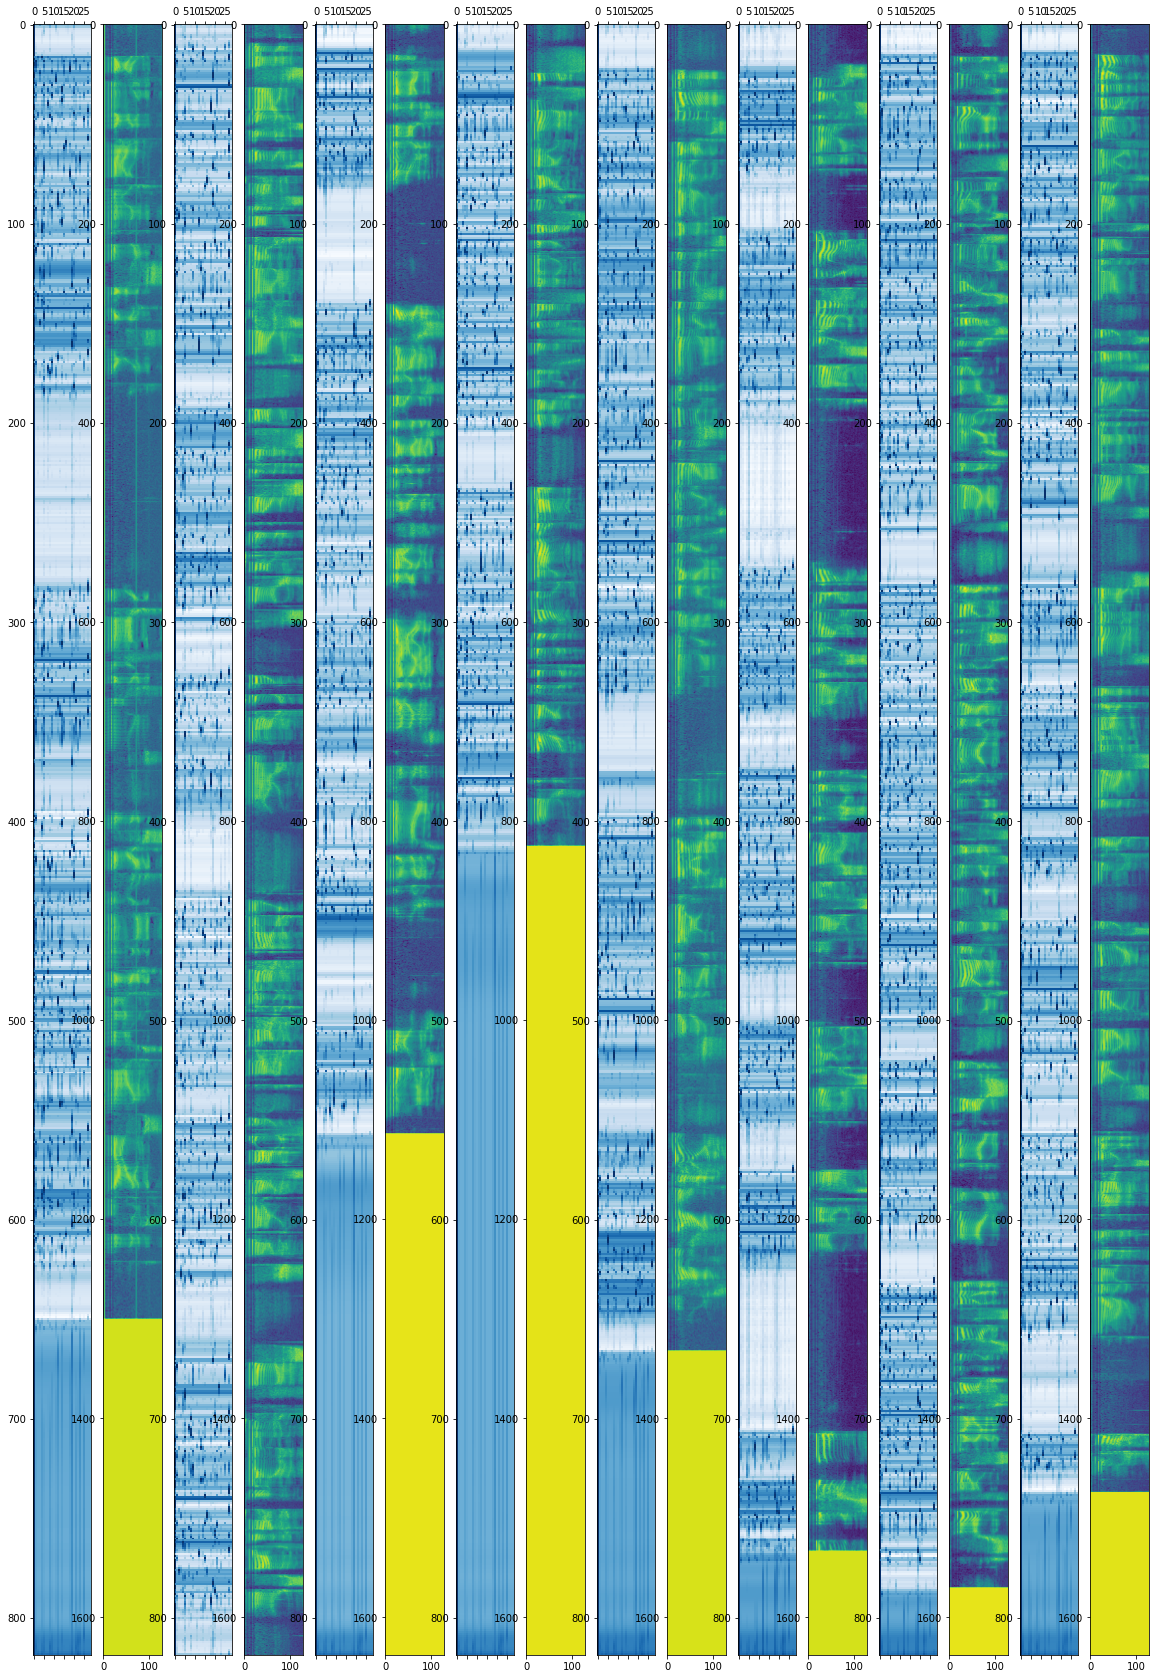

In [6]:
viz.ctc_batch(m, [testset[i] for i in range(8)], p)

In [7]:
yhat, loss = predict.predict_batch(m, [testset[i] for i in range(8)], p)
print(predict.decode_argmax(yhat, p))

['darkening thy power til lan d ba subgects light returne orgetul mus and streaight redem in gentle nunbers time so ieddly spent', 'in as ar as it is possible to a mand homsels both sented sop and piulcurs would become narrow we do not come into contact with the outside world much save through the mediom o pottad lobster', 'reer o bdisterbin e yes tyo vey was so bus i couldntcom howiver he re i am at lasst and heres tha hankeche so saying', 'si men who ere marching seperatdly in at somedistance rom each other along the walll ind who miht have been taken or a great botral', 'en then a struggl arose as to who should remane and whos shoud ind reasons wor the others not remainin the generous quurel began oresh you heve a whie wo lasyu', 'she tho siverated no you pannot wish that what i do not wish madame is thet you should parish on the skahld do you understand ased vileort oh er sthiy', 'it sheems plain that scheers wor chose more suquestered quorters to harange their plans that polititio

In [8]:
testset[0][1]

'darkening thy power to lend base subjects light return forgetful muse and straight redeem in gentle numbers time so idly spent'